In [672]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [673]:
df = pd.read_csv(r"C:\Users\anubhav.sood\Downloads\titanic.csv")

In [674]:
df.head()
# WE HAVE ID , Pclass means the class he was travelling in , sibsp- tells the no of sibling 
# that were with them or spouse, Parch tells the no of parents and child with them 
# embarked - tells the station you have boarded from

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [676]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [677]:
# Finding null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [678]:
df.duplicated().sum()

np.int64(0)

In [679]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [680]:
for i in df.columns:
    print(f"\nColumn: {i}")
    print(df[i].value_counts())


Column: PassengerId
PassengerId
1      1
2      1
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    1
891    1
Name: count, Length: 891, dtype: int64

Column: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Column: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Column: Name
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int

In [681]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [682]:
for i in df.columns:
    print(f"\nColumn: {i}")
    print(df[i].nunique())


Column: PassengerId
891

Column: Survived
2

Column: Pclass
3

Column: Name
891

Column: Sex
2

Column: Age
88

Column: SibSp
7

Column: Parch
7

Column: Ticket
681

Column: Fare
248

Column: Cabin
147

Column: Embarked
3


In [683]:
# for i in df.columns:
#     print(f"\nColumn: {i}")
#     print(df[i].unique())
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [684]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [685]:
# Step 1 
# assign types to the columns 
#  Numerical - Age, Fare, PassengerId
# Categorical - survived, pclass, sex, sibsp, Parch, Embarked
# Mixed - Name, Ticket, Cabin

# step 2 - univariate analysis 
# focuses on analysing each feature in the dataset independently
# . Distribution of each feature - shape, central tendency, dispersion
# . shape - means when we plot thecurve we see it is normal, skewed etc.
# . central tend - mean, median, mode
# . dispersion - how is the data dispersed -    variance , standard deviation - provides the measure of spread of data ,range , iqr - gap between the 25th and 75th gap 
# . Identifying potential issues - Univariate analysis helps in identifying potential problems with 
# the data such  as outliers, skewness, and missing values 
 

In [686]:
# Doing univariate anakysis on numerical columns 
# first find out the mean, median, mode, standard deviaion, range, and quartile using the describe functions
# on numerical data we can dp histograms, box plots and density plots 
# identify outliers and examin why are there what are the things that give those errors 
# skewness : if it is right or left

# PassengerId is not a feature that gives any information for people surviving 


In [687]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

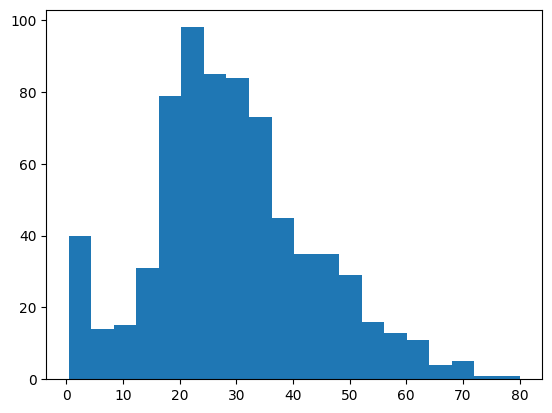

In [688]:
# df['Age'].plot(kind='hist')
plt.hist(df['Age'],bins = 20)
plt.show()
# middle age people are more and the other ages have less people 


<Axes: xlabel='Age', ylabel='Density'>

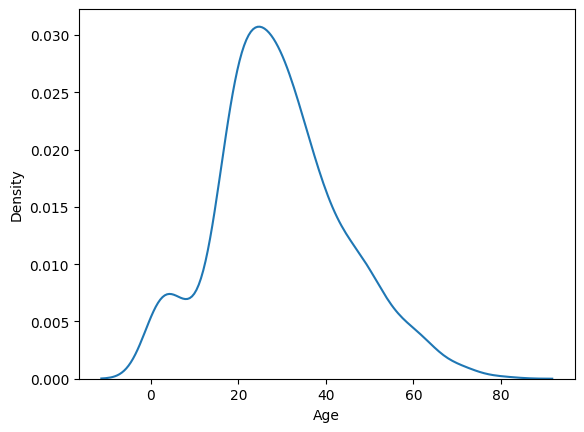

In [689]:
sns.kdeplot(df['Age'])
# this is not purely normal but on the verge of normal 


In [690]:
df['Age'].skew()
# If this no. is clos to 0 then it is near to normal distribution 


np.float64(0.38910778230082704)

<Axes: ylabel='Age'>

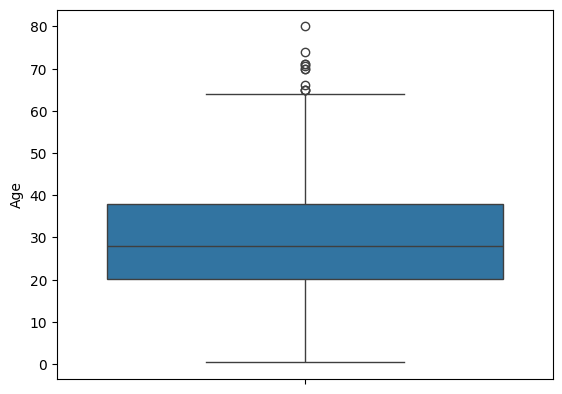

In [691]:
sns.boxplot(df['Age'])

In [692]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [693]:
df['Age'].isnull().sum()/len(df) * 100

np.float64(19.865319865319865)

In [694]:
# 20% values are missing meaning like every 5 passengers value we dont have 
# and the outliers are real values like they are real ages so do not need to be removed 
# also it is normall distributed 


In [695]:
# Fare column 

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

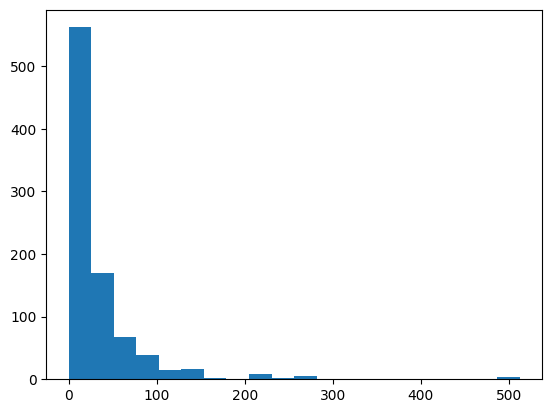

In [696]:
plt.hist(df['Fare'],bins=20)
plt.show()
# not normally distributed people travelling by giving less fare are more than the
# people with large fare amount 

<Axes: xlabel='Fare', ylabel='Density'>

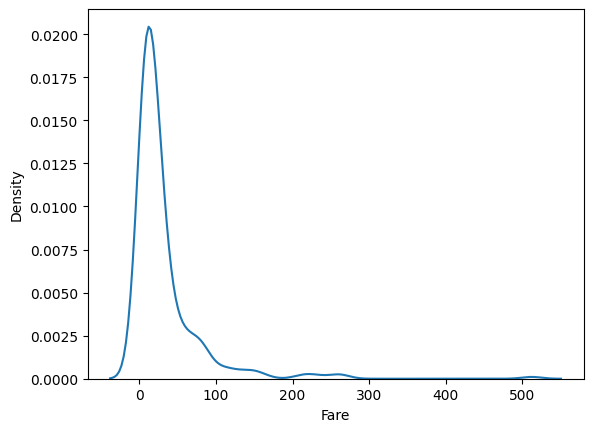

In [697]:
sns.kdeplot(df['Fare'])

In [698]:
df['Fare'].skew()
# this is right skewed data or highly positively skewed 

np.float64(4.787316519674893)

<Axes: ylabel='Fare'>

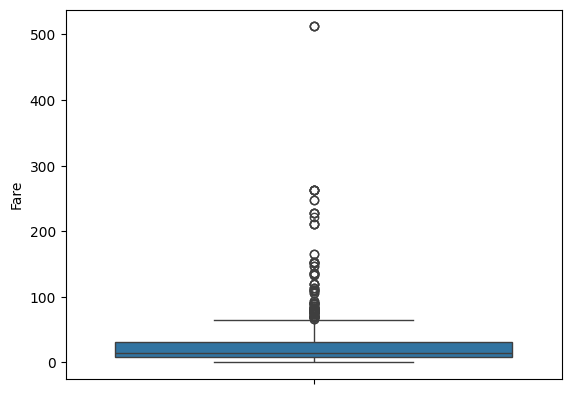

In [699]:
sns.boxplot(df['Fare'])
# a lot of outliers

In [700]:
df[df['Fare']>250]
# From this we see that fare is same and there are people having the same 
# ticket no. so that means it is the fare of the family itself that means 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [701]:
df['Fare'].isnull().sum()

# Data is positively skewed
# Fare column actually contains the group fare and not the individual and we need to create a
# new column called individual fare 

np.int64(0)

In [702]:
# Univariate on categorical column
# Descriptive statistics : frequency distribution of the categories in the column.
# Visualization : Common visualization for categorical data include count plots and pie charts.
# Missing value : check for missing values in the data and decide how to handle them.

df['Survived'].value_counts()/len(df) *100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

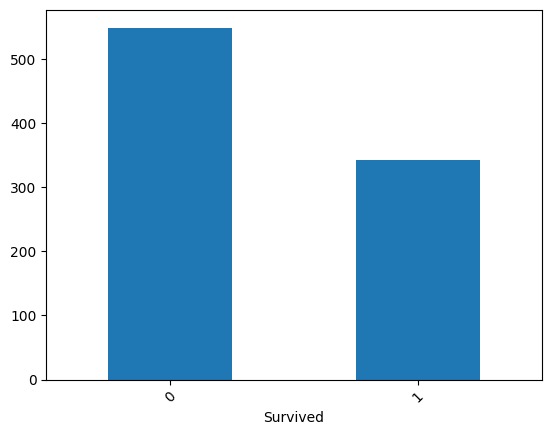

In [703]:
# survived = df['Survived'].value_counts()

# plt.bar(survived.index,survived.values)
# plt.show()
df['Survived'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

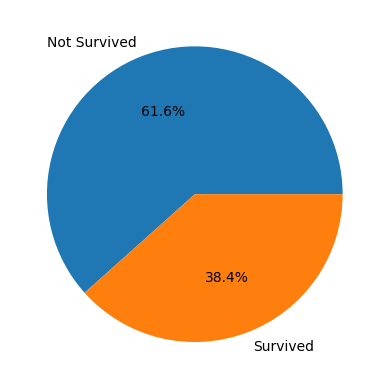

In [704]:
labels = ['Not Survived','Survived']
plt.pie(df['Survived'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.show()

In [705]:
df['Survived'].isnull().sum()
# The survival rate is less than 40%

np.int64(0)

In [706]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '3'), Text(1, 0, '1'), Text(2, 0, '2')])

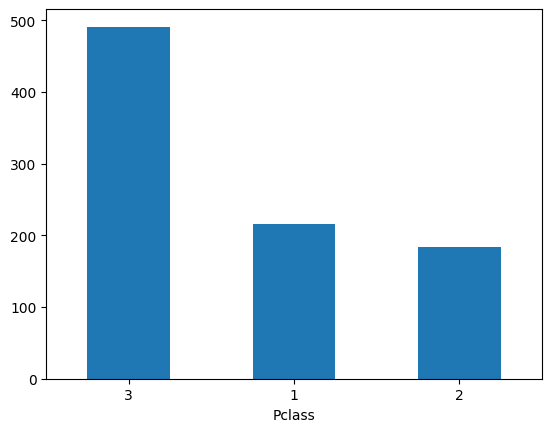

In [707]:
df['Pclass'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)

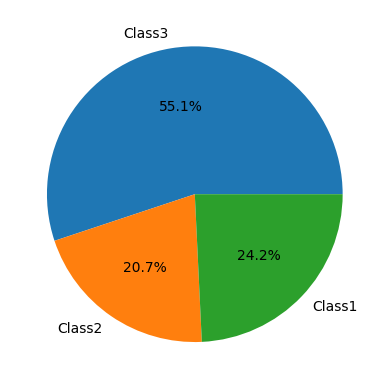

In [708]:
labels = ['Class3','Class2', 'Class1']
plt.pie(df['Pclass'].value_counts().sort_index(ascending=False),labels=labels, autopct='%1.1f%%')
plt.show()

In [709]:
df['Pclass'].isnull().sum()
# Surprisingly more than 50% percent people were travelling in the higher class 
# that is not common 

np.int64(0)

In [710]:
df['Sex'].value_counts()/len(df) *100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

<Axes: xlabel='Sex'>

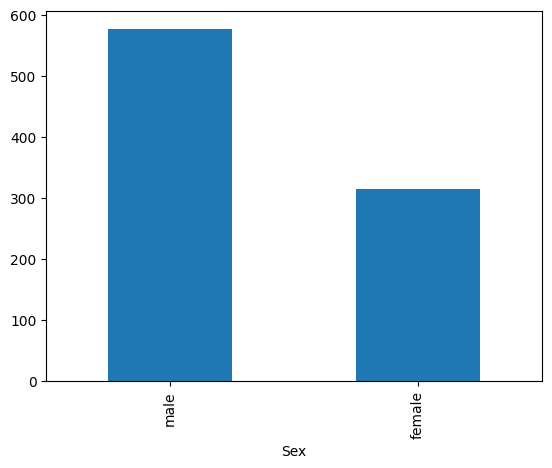

In [711]:
df['Sex'].value_counts().plot(kind = 'bar')

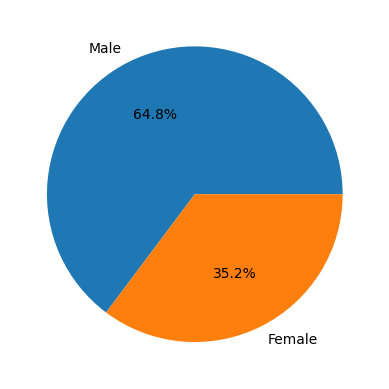

In [712]:
# df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')
labels = ['Male','Female']
plt.pie(df['Sex'].value_counts().sort_index(ascending=False),labels = labels,autopct='%1.1f%%')
plt.show()

In [713]:
df['Sex'].isnull().sum()

np.int64(0)

In [714]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

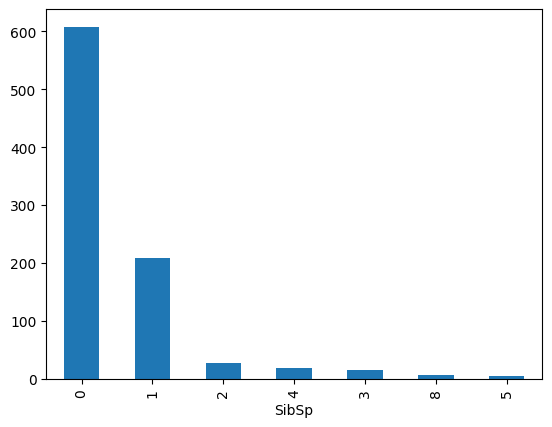

In [715]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

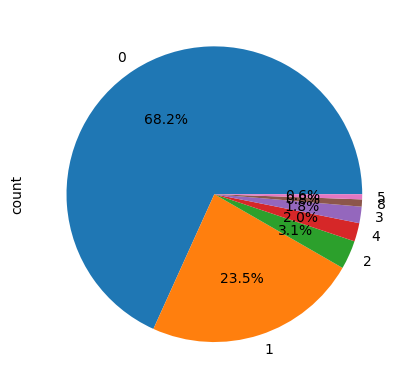

In [716]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [717]:
df['SibSp'].isnull().sum()
# This means most of the people were travelling alone 


np.int64(0)

In [718]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

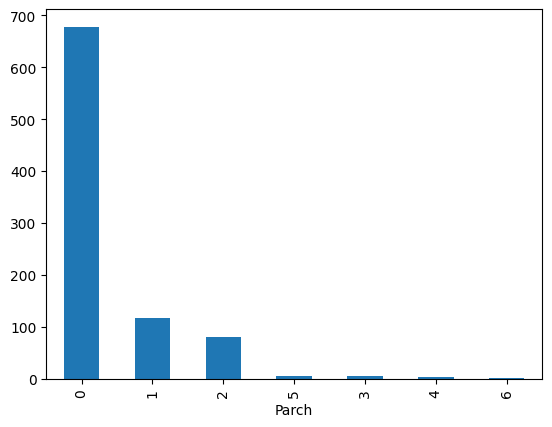

In [719]:
df['Parch'].value_counts().plot(kind='bar')

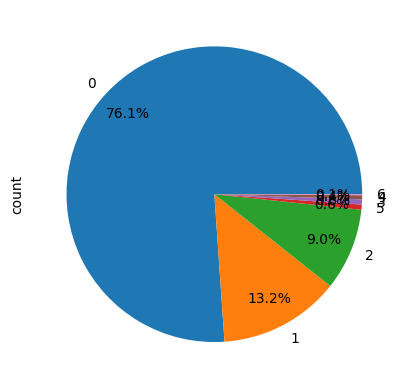

In [720]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%',pctdistance=0.8)
plt.show()

In [721]:
df['Parch'].isnull().sum()
# Most of the people didnt have children or were not travelling with the children

np.int64(0)

In [722]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

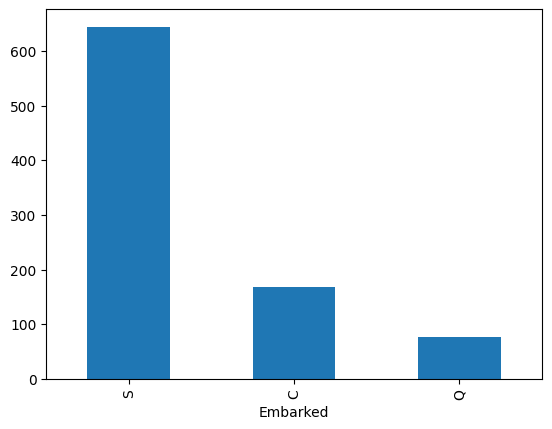

In [723]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

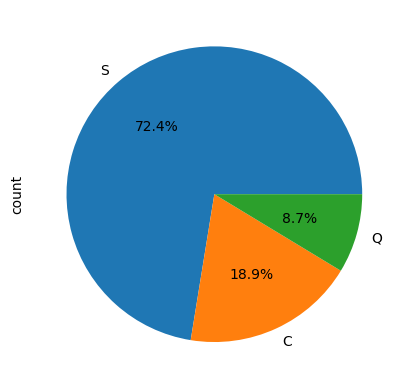

In [724]:
df['Embarked'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

In [725]:
df['Embarked'].isnull().sum()
# Most of the people boarded from the S town 

# Parch and Sibsp cols can be merged to form a new col called family size
# Create a new col called is_alone 


np.int64(2)

In [726]:
# Bivariate Analysis 
# Select 2 cols 
# understand type of relationship 
# 1. Numerical - Numerical :
#    plot graphs like scatter plot, 2d histplot, 2d kdeplots 
#    check coorelation coefficient to check linear relationship 
# 2. Numerical - categorical : create visualizations compare the distibution of the numerical 
#    data across different categories of the categorical data.
#    plot graphs like barplot, kdeplot, violinplot even scatterplots 
# 3. categorical- categorical :
#    create cross- tabulations or contingency tables that show the distribution 
#    of values in one categorical column, grouped by the values in the other categorical column
#    plot like heatmap, stacked barplots, treemaps

  

In [727]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [728]:
# two categorical columns bivariate 
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns') * 100#now it comes in percentages if we dont use normalize it is without that
# this is contigency table or a cross tab

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

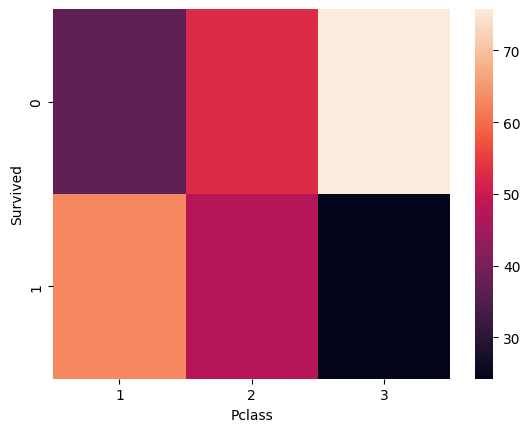

In [729]:
# Pclass 3 was the most dangerous class because it is the one which had most deaths 
# and also the risk was the most
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns') * 100)

In [730]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns') * 100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

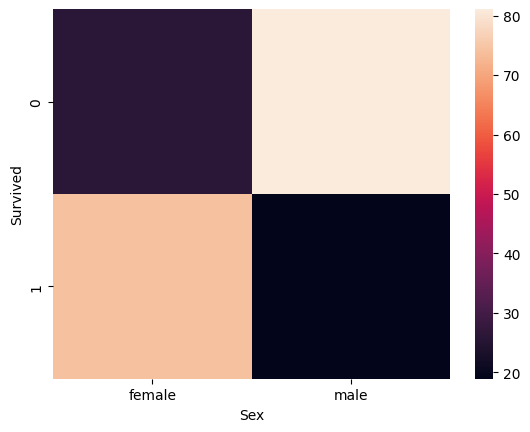

In [731]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns') * 100)
# females were saved more than the male 

In [732]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns') * 100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [733]:
# the people who boarded from c had the highest survival rate
# meaning either the  pclass 1 were from c or there was a more percentage of female that boarded from c 
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns') * 100
# there is a pretty much similar ratio of both male and female 
# we will look for the pclass now suprisingly the male attendance is more

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [734]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns') * 100
# but there is a significantly high percentage of pepole in class 1 that boarded from c
# this is the reason that c has a bigger percentage of survivor because they had a more percentage of class 1 person


Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


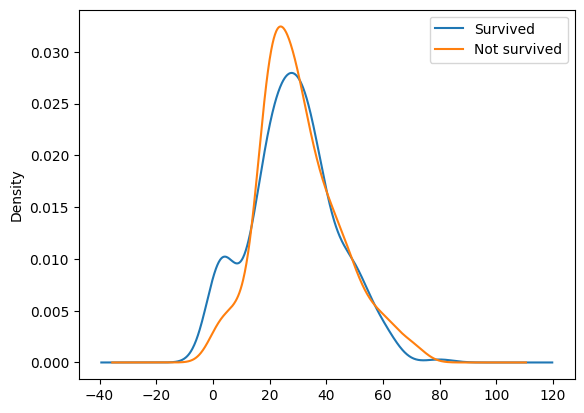

In [735]:
# survived with age relationship 
# sns.kdeplot(df[df['Survived']==1]['Age'])
df[df['Survived'] == 1]['Age'].plot(kind='kde',label = 'Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label=  'Not survived')
plt.legend()
plt.show()
# the age group from 0-5 is higher than other age group 

In [736]:
df[df['Pclass']==1]['Age'].mean()

np.float64(38.233440860215055)

In [737]:
# Feature Engineering of Fare Col
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [738]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [739]:
df[df['Ticket']== 'CA. 2343']
# this person has 10 family members but we have data of oly 7 either the 4 left have 
# different ticket or the data is missing or either they are in the test data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [740]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [741]:
df1 = pd.read_csv(r'C:\Users\anubhav.sood\Downloads\test.csv')

In [742]:
df1[df1['Ticket']=='CA. 2343']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


In [743]:
df = pd.concat([df,df1])

In [744]:
df['IndividualFare'] = df['Fare']/(df['SibSp']+df['Parch']+1)


In [745]:
df['IndividualFare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: IndividualFare, Length: 1309, dtype: float64

<Axes: >

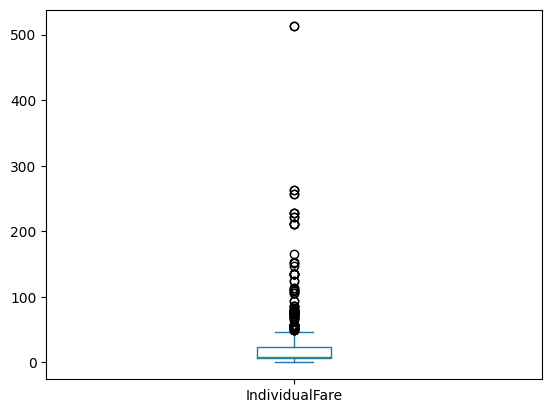

In [746]:
df['IndividualFare'].plot(kind='box')

In [747]:
df[['IndividualFare','Fare']].describe()

,IndividualFare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [748]:
df['FamilySize'] = df['SibSp']+df['Parch']+1

In [749]:
# Family Type
# 1-> alone
# 2-4-> small
# 5->large

def  assign_family_type(num):
    if num == 1 :
        return 'Alone'
    elif 2<=num<=4 :
        return 'Small'
    else :
        return 'Large'

In [750]:
df['FamilyType'] = df['FamilySize'].apply(assign_family_type)

In [751]:
df[['FamilyType','FamilySize']]

,FamilyType,FamilySize
0,Small,2
1,Small,2
2,Alone,1
3,Small,2
4,Alone,1
...,...,...
413,Alone,1
414,Alone,1
415,Alone,1
416,Alone,1


In [752]:
pd.crosstab(df['Survived'],df['FamilyType'],normalize='columns') * 100

FamilyType,Alone,Large,Small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [753]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IndividualFare,FamilySize,FamilyType
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone


In [754]:
df['Surname'] = df['Name'].str.split(',').str[0]

In [755]:
df['Surname']

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Surname, Length: 1309, dtype: object

In [756]:
df['Titles'] = df['Name'].str.split(',').str[1].str.strip().str.split(' ').str[0]
# strip to remove leading and trailing spaces 

In [757]:
df['Titles'].value_counts()

Titles
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Mme.           1
Don.           1
Sir.           1
Lady.          1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [758]:
rare_titles = ['Rev.', 'Dr.', 'Col.', 'Major.', 'Don.', 'Capt.', 'the', 'Jonkheer.']
df['Titles'] = df['Titles'].replace(rare_titles, 'Other')

In [ ]:
df['Titles'] = df['Titles'].replace({
    'Sir.': 'Mr.',
    'Mlle.': 'Miss.',
    'Ms.': 'Miss.',
    'Mme.': 'Mrs.',
    'Dona.': 'Mrs.',
    'Lady.': 'Mrs.'
})

In [760]:
df['Titles'].value_counts()

Titles
Mr.        758
Miss.      264
Mrs.       200
Master.     61
Other       26
Name: count, dtype: int64

In [761]:
pd.crosstab(df['Survived'],df['Titles'],normalize='columns') * 100

Titles,Master.,Miss.,Mr.,Mrs.,Other
Survived,,,,,
0.0,42.5,29.72973,84.169884,20.472441,71.428571
1.0,57.5,70.27027,15.830116,79.527559,28.571429


In [764]:
df['Cabin'].isnull().sum()/len(df)*100

np.float64(77.46371275783041)

In [765]:
df['Cabin'].fillna('M',inplace= True)

In [766]:
df['deck'] = df['Cabin'].str[0]

In [767]:
df.deck.value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [769]:
pd.crosstab(df['deck'],df['Pclass']) 

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

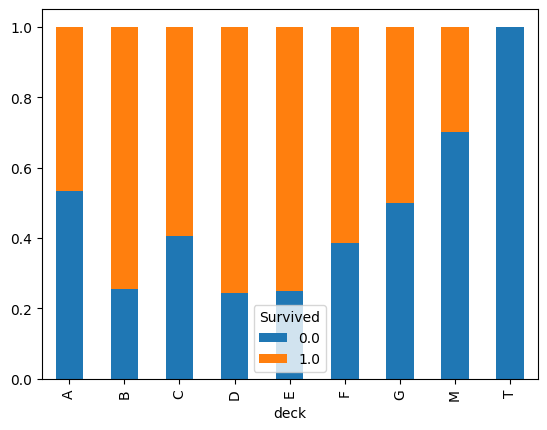

In [773]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

In [777]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IndividualFare,FamilyType,Surname,Titles,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,M,S,3.625,Small,Braund,Mr.,M


In [776]:
df.drop(columns=['SibSp','Parch','FamilySize'],inplace=True)